# Cisco Stream Cipher Simplified - Exercises!

- One of the encryption schemes employed by Cisco routers to encrypt passwords is a stream cipher. It
  uses the following fixed keystream:
  - 43ce4b1d9a0da82cffee6daba2b8629017b2fc38a5a54b547f24bfdb647d82386dbfd753f535b3332c158effb8462dc5432A   
   
  
- When a password is to be encrypted, the password function chooses a number between 0 and 15, and
that becomes the offset into the keystream. The password is XORed with the keystream of the same
length.

- Consider the following example. A secret password is displayed in the router configuration as:
  - password 0706a90fba89e4006f5763b352d57593684a    
  
  
- where the ”07" indicates the encryption type, the leading "06" indicates the offset into the keystream,
and the remaining bytes are the encrypted password characters. XORing the password with the start
of the keystream corresponds with offset 0.

- What is the password?
  
- Passwords and encrypted passwords are just numbers. We do not perform any conversion from and to
characters.

In [2]:
import binascii
from operator import xor
from cryptocourse import basic_crypto

stream= b"dsfd;kfoA,.iyewrkldJKDHSUBsgvca69834ncx"
encrypted_password = "7 06070D22484B0F1E0D"

# remove prefix 7 => encryption type & 06 => offset keystream

encrypted = bytes.fromhex('070D22484B0F1E0D')



#xor with key => offset 6 bytes => 12 hex digits
#cutoff equal length of password + 16

part_of_stream = stream[6:6+len(encrypted)]
print(part_of_stream)
print(encrypted)
print(len(part_of_stream))

decrypted = basic_crypto.byte_xor(part_of_stream, encrypted)

print(decrypted)

b'foA,.iye'
b'\x07\r"HK\x0f\x1e\r'
8
b'abcdefgh'


# Calculate a stream cipher - exercises !

- Given this stream
  
  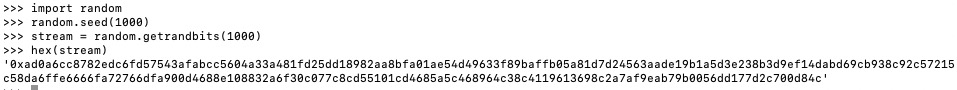

- or this stream
  
  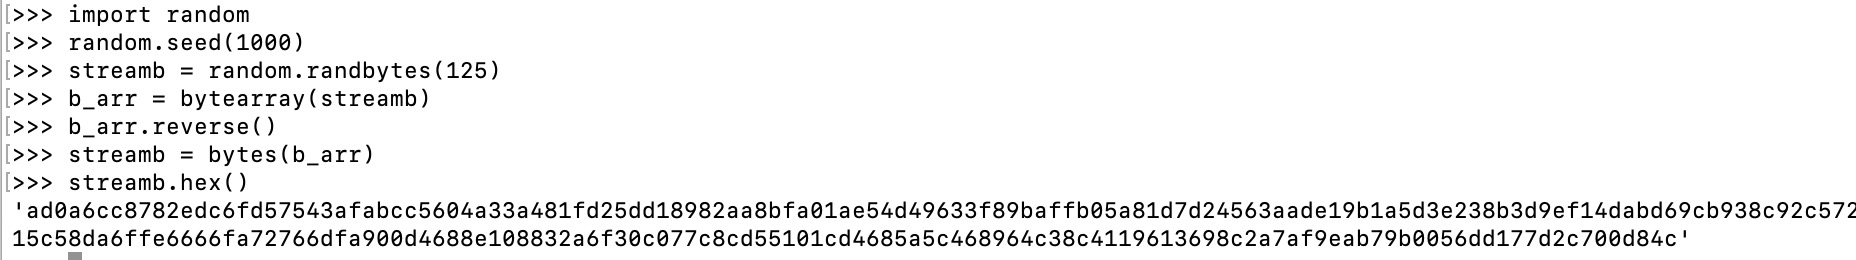
  
- Calculate the stream cipher for the input
0xABCDEF0123456789ABCDEF0123456789ABCDEF0123456789ABCDEF0123456789

# The stream key in bits to hex !

In [2]:
import random
from operator import xor

key = 0x1A2B3C
iv = 0x4D5E6F
random.seed(key+iv)
stream = random.getrandbits(1024)


print(hex(stream))

# get a streamkey, cut it off to be equal to your plaintext in length

plain =     0x1234567890ABCDEF
streamkey = 0xe3b536e419a38295

cipher = xor(plain, streamkey)

print("Cipher in hex :" , hex(cipher))



0xe3b536e419a38295939731b3aab9d81c032c6dfd342dae3767570bd623c94bcf5128b112db7cc6fd4f89e3a1a53f2841c02766384e883434883ac3d25b08153063804bb9b8fc4bb7637f5900c7932ab438558d80e86cff199d06fd500421a68c6944568faab3fa1ea6d7492a3dfc9a4c065851245df91ce622091c7848d08d93
Cipher in hex : 0xf181609c89084f7a


# Given stream => plain => give cihper

In [19]:
import random
from operator import xor

key = 123456
random.seed(key)
stream = random.getrandbits(1000)

print(stream)

# get a streamkey, cut it off to be equal to your plaintext in length

plain =     0x200300400500600700800900100A00B00C00D00E00F00000
streamkey = 0x1cf1decf64ab6099e45d210358d0e9dff5cf877b36f60636

cipher = xor(plain, streamkey)

print("Cipher in hex :" , hex(cipher))
print("Cipher in bytes :", cipher)


8398231685809407172451682269257939904622742059594351494612857157344458257892706508634210696198234983202233388400374487261777696587627396022506087049138061726512778158639193788236983720214348753564720265197644148092158143254665177818100428220168598919090168995143021406264707708616793435738410627994720
Cipher in hex : 0x3cf2de8f61ab009ee4dd280348dae96ff9cf577536060636
Cipher in bytes : 1494457983900222387468135235910697262535858697646603896374


# Obtain stream bytes secret number

In [21]:
import random
from cryptocourse import basic_crypto

secret_number = 123456
random.seed(secret_number)    # to ensure that the other side can generate the same pseudo-random number 
full_stream = random.getrandbits(1000)

print("full stream",full_stream)

plain =          '100200300400500600700800900A00B00C00D00E00F00000'
part_of_stream = '839823168580940717245168226925793990462274205959'
print("length plain",len(plain))
offset = 0

#string to hex

plain = bytearray.fromhex(plain)
part_of_stream = bytearray.fromhex(part_of_stream)


cipher = basic_crypto.byte_xor(plain, part_of_stream)   # Remember there is no Python XOR operation for bytes
print("cipher : ",(bytes.hex(cipher)))
decrypt = basic_crypto.byte_xor(cipher, part_of_stream)
print("Decrypt :", decrypt.hex())
print("Decrypt == plain",decrypt.hex() == plain.hex())
offset = offset + len(plain)     # Do not reuse the same part of a stream more than once


full stream 8398231685809407172451682269257939904622742059594351494612857157344458257892706508634210696198234983202233388400374487261777696587627396022506087049138061726512778158639193788236983720214348753564720265197644148092158143254665177818100428220168598919090168995143021406264707708616793435738410627994720
length plain 48
cipher :  939a23268180c40117545968b26325c93590962c74d05959
Decrypt : 100200300400500600700800900a00b00c00d00e00f00000
Decrypt == plain True


# Calculate a stream cipher 2

- Given the stream that you obtain using this mechanism (LFSR):

    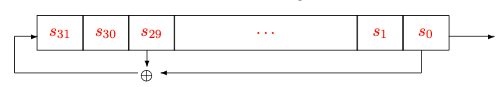
    
    s32 = s29 + s0

- The initial value of the stream = 0x12345678
- Calculate the stream cipher for the input :
  - 0xABCDEF0123456789ABCDEF0123456789ABCDEF0123456789ABCDEF0123456789

In [35]:
from cryptocourse import permute
from cryptocourse import basic_crypto

plain = 'ABCDEF0123456789ABCDEF0123456789ABCDEF0123456789ABCDEF0123456789'


seed = 0x12345678
seed.bit_length()

#LFSR = Linear Feedback Shift Register 32 bit

# mask in bits S0 = 1,s29 =
mask = 0b10000000000000000000000000000100
mask.bit_length()

keystr = permute.lfsr(seed, mask, 256)
print((keystr.hex()))

cipher = basic_crypto.byte_xor(bytes.fromhex(plain), keystr) # keystr is 256 bits long
print(cipher.hex())

12345678103214e480348469b6e9b22c30f7590d80ea1a452466c20596b0d921
b9f9b9793377736d2bf96b6895acd5a59b3ab60ca3af7dcc8fab2d04b5f5bea8


In [22]:
import random
from cryptocourse import basic_crypto

key = 0x123456
random.seed(key)
stream = random.getrandbits(1000)
plain = '100200300400500600700800900A00B00C00D00E00F00000'

cipher = basic_crypto.byte_xor(bytes.fromhex(plain),bytes.fromhex(key))  

print(cipher.hex())

TypeError: object of type 'int' has no len()